Remove duplicates and outliers (pCHEMBL <2 OR >12)

In [10]:
import pandas as pd
from rdkit import Chem

# Load the CSV dataset
file_path = 'TRPM8-homosapien-compounds-activities-processed.csv'
print(f"Loading dataset from {file_path}...")

df = pd.read_csv(file_path)
print(f"Initial dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")
print("First few rows of initial dataset:")
print(df.head(), "\n")

# Step 1: Keep only necessary columns (pCHEMBL Value is the -log IC50, the target value)
columns_to_keep = [
    'Molecule ChEMBL ID',
    'Smiles',
    'pChEMBL Value'
]
df = df[columns_to_keep]
print(f"After keeping only necessary columns, dataset contains {df.shape[1]} columns: {columns_to_keep}\n")

# Step 2: Remove duplicates based on 'Molecule ChEMBL ID' and 'Smiles'
print("Checking for duplicates...")
before_duplicates = df.shape[0]
df = df.drop_duplicates(subset=['Molecule ChEMBL ID', 'Smiles'])
after_duplicates = df.shape[0]
print(f"Removed {before_duplicates - after_duplicates} duplicate rows. Remaining rows: {after_duplicates}\n")

# Step 3: Remove rows with empty pChEMBL Value (this is -logIC50)
before_missing = df.shape[0]
df = df.dropna(subset=['pChEMBL Value'])
after_missing = df.shape[0]
print(f"Removed {before_missing - after_missing} rows with missing pChEMBL Value. Remaining rows: {after_missing}\n")


# Step 4: Remove outliers with pChEMBL Value < 2 or > 12
print("Checking for pChEMBL outliers...")
outliers = df[(df['pChEMBL Value'] < 2) | (df['pChEMBL Value'] > 12)]
print(f"Found {outliers.shape[0]} outliers with pChEMBL Value < 2 or > 12:")
print(outliers)

# Remove outliers
before_outliers = df.shape[0]
df = df[(df['pChEMBL Value'] >= 2) & (df['pChEMBL Value'] <= 12)]
after_outliers = df.shape[0]
print(f"Removed {before_outliers - after_outliers} outlier rows. Remaining rows: {after_outliers}\n")

# Step 5: Ensure valid SMILES representation (removing invalid SMILES)
def is_valid_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    return mol is not None

df['valid_smiles'] = df['Smiles'].apply(is_valid_smiles)
df = df[df['valid_smiles']].drop(columns=['valid_smiles'])

print("Validating SMILES strings...")
df['valid_smiles'] = df['Smiles'].apply(is_valid_smiles)
invalid_smiles_count = (~df['valid_smiles']).sum()
print(f"Found {invalid_smiles_count} invalid SMILES. Removing them...\n")
df = df[df['valid_smiles']].drop(columns=['valid_smiles'])

print(f"Final dataset contains {df.shape[0]} rows.\n")
print("First few rows of final cleaned dataset:")
print(df.head(), "\n")

# Save the cleaned file
output_file = '../processed/TRPM8_cleaned_preprocessed.csv'
df.to_csv(output_file, index=False)

print(f"Cleaned file saved as '{output_file}'")


Loading dataset from TRPM8-homosapien-compounds-activities-processed.csv...
Initial dataset contains 654 rows and 25 columns.

First few rows of initial dataset:
  Molecule ChEMBL ID  Molecular Weight  #RO5 Violations  AlogP Compound Key  \
0      CHEMBL3235962            421.42              1.0   5.76           22   
1      CHEMBL3235983            434.36              1.0   5.45           44   
2      CHEMBL1650511            467.41              1.0   7.09            5   
3      CHEMBL2443068            438.83              1.0   5.39           9b   
4      CHEMBL3959823            358.44              0.0   3.86           9n   

                                              Smiles Standard Type  \
0  N#Cc1cccc(NC(=O)N2CCc3ccccc3[C@H]2c2ccc(C(F)(F...          IC50   
1  C[C@H](NC(=O)N1CCc2ccccc2[C@H]1c1ccc(C(F)(F)F)...          IC50   
2  FC(F)(F)c1ccccc1-c1cc(C(F)(F)F)c2[nH]c(C3=NOC4...          IC50   
3  O=C1CC2(CCN(C(=O)Nc3ccc(C(F)(F)F)cc3)CC2)Oc2c(...          IC50   
4  Cc1cccc(CN

pCHEMBL Value (-log IC50) distribution

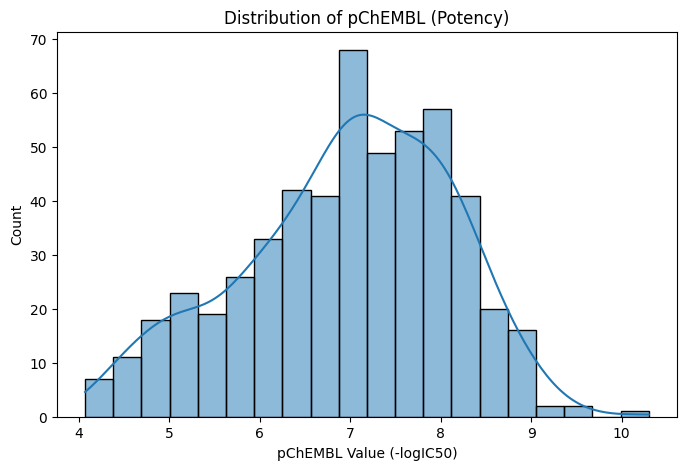

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['pChEMBL Value'], kde=True, bins=20)
plt.title('Distribution of pChEMBL (Potency)')
plt.xlabel('pChEMBL Value (-logIC50)')
plt.show()

Distribution of SMILES length 

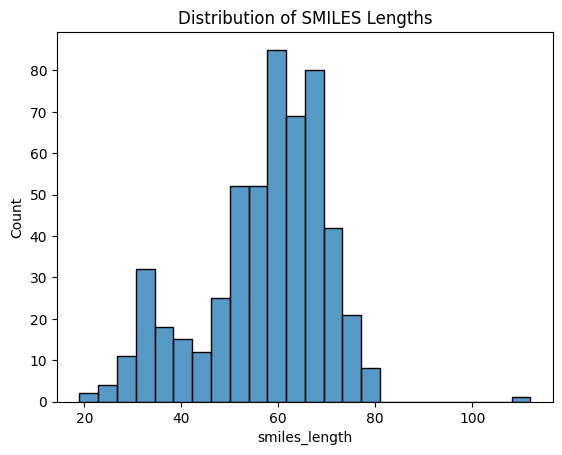

In [8]:
df['smiles_length'] = df['Smiles'].apply(len)
sns.histplot(df['smiles_length'])
plt.title('Distribution of SMILES Lengths')
plt.show()